## Analytical valuation of CVA / DVA equity swap
Use the Black-Scholes Model with μ = 5%, r = 2%, σ = 15%,
q = λ = 2%, and T = 5. Total notional on the swap equals 100m and recovery equals 40%. The bank is paying the fixed leg with a fixed rate equal to 4%. For these computations you may assume a discrete time grid.

• Compute the analytical value of an annual equity swap using the Black-Scholes model.

• Compute the Expected Future exposures (E0[Ex(t)]).

• Compute the Expected Positive Exposure.

• Compute the Expected Negative Exposure.

• Compute the Potential Future Exposure with 95%.

• Compute the CVA and DVA.

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
r=0.02
mu=0.05
sigma=0.15
lamda=0.02
K=0.04
T=5

In [3]:
#create a table to store values
df = pd.DataFrame([[0]*5],[[0]*6] )
df.columns = ['Value of Swap', "Expected Exposure", 'Expected Positive Exposure', "Expected Negative Exposure", "Potential Future Exposure"]
df.reset_index(inplace = True)
df.drop(['level_0'], axis = 1, inplace = True)
df

,Value of Swap,Expected Exposure,Expected Positive Exposure,Expected Negative Exposure,Potential Future Exposure
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0


In [4]:
years=[0,1,2,3,4,5]
Swap_value=[]

for t in years:
    PV=0
    for i in range (t+1, T+1):
        cash_flow= ((mu-(sigma**2)/2)-K)*100000000/((1+r)**(i-t))
        PV += cash_flow
    Swap_value.append (PV)
    print ('Value of swap at time {} is {}'.format (t,PV))
    df['Value of Swap'].iloc[t] = "{:0,.2f}".format(PV)

Value of swap at time 0 is -589182.4385630229
Value of swap at time 1 is -475966.0873342839
Value of swap at time 2 is -360485.40908097016
Value of swap at time 3 is -242695.11726259018
Value of swap at time 4 is -122549.01960784257
Value of swap at time 5 is 0


In [5]:
for t in range (0,T+1):
    EE= ((mu-(sigma**2)/2)-K)*100000000+Swap_value[t]
    print ('EE at time {} is {}'.format (t,EE)) 
    df['Expected Exposure'].iloc[t] = "{:0,.2f}".format(EE)

EE at time 0 is -714182.4385630223
EE at time 1 is -600966.0873342834
EE at time 2 is -485485.4090809696
EE at time 3 is -367695.1172625896
EE at time 4 is -247549.01960784197
EE at time 5 is -124999.99999999942


In [6]:
Ex_PE=[]

for t in range (0,T+1):
    EPE= (((mu-K)*norm.cdf((mu-K)/sigma)+sigma * norm.pdf((mu-K)/sigma))*100000000*np.exp(-0.02))+Swap_value[t]
    Ex_PE.append(EPE)
    print ('EPE at time {} is {}'.format (t,EPE)) 
    df['Expected Positive Exposure'].iloc[t] = "{:0,.2f}".format(EPE)

EPE at time 0 is 5779587.238645249
EPE at time 1 is 5892803.589873988
EPE at time 2 is 6008284.268127302
EPE at time 3 is 6126074.559945682
EPE at time 4 is 6246220.657600429
EPE at time 5 is 6368769.677208272


In [7]:
Ex_NE=[]

for t in range (0,T+1):
    ENE= (((K-mu)*norm.cdf((K-mu)/sigma)+sigma * norm.pdf((mu-K)/sigma))*100000000*np.exp(-0.02))+Swap_value[t]
    Ex_NE.append(ENE)
    print ('ENE at time {} is {}'.format (t,ENE)) 
    df['Expected Negative Exposure'].iloc[t] = "{:0,.2f}".format(ENE)

ENE at time 0 is 4799388.565338493
ENE at time 1 is 4912604.916567232
ENE at time 2 is 5028085.594820546
ENE at time 3 is 5145875.886638926
ENE at time 4 is 5266021.984293673
ENE at time 5 is 5388571.003901516


In [8]:
years=[0,1,2,3,4,5]

for t in years:
    PFE=0
    for i in range (t+1, T+1):
        cash_flow= ((mu-(sigma**2)/2)+norm.ppf(0.95)*sigma*np.sqrt(1)-K)*100000000/((1+r)**(i-t))
        PFE += cash_flow
    print ('PFE at time {} is {}'.format (t,PFE)) 
    df["Potential Future Exposure"].iloc[t] = "{:0,.2f}".format(PFE)

PFE at time 0 is 115705082.08221763
PFE at time 1 is 93471379.31958991
PFE at time 2 is 70793002.50170963
PFE at time 3 is 47661058.14747174
PFE at time 4 is 24066474.906149097
PFE at time 5 is 0


In [9]:
df.index.name = "Year"
df

,Value of Swap,Expected Exposure,Expected Positive Exposure,Expected Negative Exposure,Potential Future Exposure
Year,,,,,
0,"-589,182.44","-714,182.44","5,779,587.24","4,799,388.57","115,705,082.08"
1,"-475,966.09","-600,966.09","5,892,803.59","4,912,604.92","93,471,379.32"
2,"-360,485.41","-485,485.41","6,008,284.27","5,028,085.59","70,793,002.50"
3,"-242,695.12","-367,695.12","6,126,074.56","5,145,875.89","47,661,058.15"
4,"-122,549.02","-247,549.02","6,246,220.66","5,266,021.98","24,066,474.91"
5,0.00,"-125,000.00","6,368,769.68","5,388,571.00",0.00


### Method 1

In [10]:
def CVA_1 (mu,K, sigma):

    Total_CVA=0
    for i in range (1,T+1):
        Total_CVA += 0.6* (((mu-K)*norm.cdf((mu-K)/sigma)+sigma * norm.pdf((mu-K)/sigma))*100000000*(1-np.exp(-0.02*i)))/((1+r)**i)

    return Total_CVA/5


def DVA_1 (mu,K, sigma):

    Total_DVA=0
    for i in range (1,T+1):
        Total_DVA += 0.6* (((K-mu)*norm.cdf((K-mu)/sigma)+sigma * norm.pdf((mu-K)/sigma))*100000000*(1-np.exp(-0.02*i)))/((1+r)**i)

    return Total_DVA/5

In [11]:
CVA_1 (mu,K, sigma)

209891.26165832215

In [12]:
DVA_1(mu,K, sigma)

177587.5127957393

### Method 2

In [13]:
Total_CVA=0
for i in range (1,T+1):
    Total_CVA += 0.6* 0.5* (Ex_PE[i]+ Ex_PE[i-1])*(1-np.exp(-0.02*i))/((1+r)**i)

CVA= Total_CVA/5
CVA

198426.66045633223

In [14]:
Total_DVA=0
for i in range (1,T+1):
    Total_DVA += 0.6* 0.5* (Ex_NE[i]+ Ex_NE[i-1])*(1-np.exp(-0.02*i))/((1+r)**i)

DVA= Total_DVA/5
DVA

166762.56867839396

### Notional 20 Mil
Use the Black-Scholes Model with μ = 5%, r = 2%, σ = 15%, q = 2%, and T = 5. The recovery is again equal to 40%. We now consider a portfolio of 5 independent equity swaps (i.e. for 5 different stocks) with a notional of 20 each. Again the bank is paying the fixed leg. For these calculations you may assume a discrete time grid.

• Compute the analytical value of an equity swap using the Black-Scholes model.

• Compute the Expected Future exposures.

• Compute the Expected Positive Exposure.

• Compute the Expected Negative Exposure.

• Compute the Potential Future Exposure with 95%.

• Compute the CVA and DVA.

• Compare the numbers to the numbers for the single equity swap. As a bank, which position would you prefer.

In [15]:
df2 = pd.DataFrame([[0]*5],[[0]*6] )
df2.columns = ['Value of Swap', "Expected Exposure", 'Expected Positive Exposure', "Expected Negative Exposure", "Potential Future Exposure"]
df2.reset_index(inplace = True)
df2.drop(['level_0'], axis = 1, inplace = True)
df2

,Value of Swap,Expected Exposure,Expected Positive Exposure,Expected Negative Exposure,Potential Future Exposure
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0


In [16]:
years=[0,1,2,3,4,5]
Swap_value=[]

for t in years:
    PV2=0
    for i in range (t+1, T+1):
        cash_flow2= ((mu-(sigma**2)/2)-K)*20000000/((1+r)**(i-t))
        PV2 += cash_flow2
    Swap_value.append (PV2)
    print ('Value of swap at time {} is {}'.format (t,PV2*5)) 
    df2['Value of Swap'].iloc[t] = "{:0,.2f}".format(PV2*5)

Value of swap at time 0 is -589182.4385630228
Value of swap at time 1 is -475966.08733428386
Value of swap at time 2 is -360485.4090809701
Value of swap at time 3 is -242695.11726259018
Value of swap at time 4 is -122549.01960784257
Value of swap at time 5 is 0


In [17]:
for t in range (0,T+1):
    EE= ((mu-(sigma**2)/2)-K)*20000000+Swap_value[t]
    print ('EE of Portfolio at time {} is {}'.format (t,EE*5)) 
    df2['Expected Exposure'].iloc[t] = "{:0,.2f}".format(EE*5)

EE of Portfolio at time 0 is -714182.4385630223
EE of Portfolio at time 1 is -600966.0873342833
EE of Portfolio at time 2 is -485485.4090809695
EE of Portfolio at time 3 is -367695.1172625896
EE of Portfolio at time 4 is -247549.01960784197
EE of Portfolio at time 5 is -124999.99999999942


In [18]:
Ex_PE2=[]

for t in range (0,T+1):
    EPE= (((mu-K)*norm.cdf((mu-K)/sigma)+sigma * norm.pdf((mu-K)/sigma))*20000000*np.exp(-0.02))+Swap_value[t]
    Ex_PE2.append(EPE)
    print ('EPE of Portfolio at time {} is {}'.format (t,EPE*5)) 
    df2['Expected Positive Exposure'].iloc[t] = "{:0,.2f}".format(EPE*5)

EPE of Portfolio at time 0 is 5779587.23864525
EPE of Portfolio at time 1 is 5892803.589873988
EPE of Portfolio at time 2 is 6008284.268127302
EPE of Portfolio at time 3 is 6126074.559945682
EPE of Portfolio at time 4 is 6246220.65760043
EPE of Portfolio at time 5 is 6368769.677208272


In [19]:
Ex_NE2=[]

for t in range (0,T+1):
    ENE= (((K-mu)*norm.cdf((K-mu)/sigma)+sigma * norm.pdf((mu-K)/sigma))*20000000*np.exp(-0.02))+Swap_value[t]
    Ex_NE2.append(ENE)
    print ('ENE of Portfolio at time {} is {}'.format (t,ENE*5)) 
    df2['Expected Negative Exposure'].iloc[t] = "{:0,.2f}".format(ENE*5)

ENE of Portfolio at time 0 is 4799388.565338492
ENE of Portfolio at time 1 is 4912604.916567231
ENE of Portfolio at time 2 is 5028085.594820545
ENE of Portfolio at time 3 is 5145875.8866389245
ENE of Portfolio at time 4 is 5266021.984293673
ENE of Portfolio at time 5 is 5388571.003901515


In [20]:
years=[0,1,2,3,4,5]

for t in years:
    PFE=0
    for i in range (t+1, T+1):
        cash_flow= ((mu-(sigma**2)/2)+norm.ppf(0.95)*sigma*np.sqrt(1)-K)*20000000/((1+r)**(i-t))
        PFE += cash_flow
    print ('PFE at time {} is {}'.format (t,PFE*5)) 
    df2["Potential Future Exposure"].iloc[t] = "{:0,.2f}".format(PFE*5)

PFE at time 0 is 115705082.08221765
PFE at time 1 is 93471379.31958991
PFE at time 2 is 70793002.50170963
PFE at time 3 is 47661058.14747174
PFE at time 4 is 24066474.906149097
PFE at time 5 is 0


In [21]:
df2.index.name = "Year"
df2

,Value of Swap,Expected Exposure,Expected Positive Exposure,Expected Negative Exposure,Potential Future Exposure
Year,,,,,
0,"-589,182.44","-714,182.44","5,779,587.24","4,799,388.57","115,705,082.08"
1,"-475,966.09","-600,966.09","5,892,803.59","4,912,604.92","93,471,379.32"
2,"-360,485.41","-485,485.41","6,008,284.27","5,028,085.59","70,793,002.50"
3,"-242,695.12","-367,695.12","6,126,074.56","5,145,875.89","47,661,058.15"
4,"-122,549.02","-247,549.02","6,246,220.66","5,266,021.98","24,066,474.91"
5,0.00,"-125,000.00","6,368,769.68","5,388,571.00",0.00


## Method 1

In [22]:
def CVA_2 (mu,K, sigma):

    Total_CVA=0
    for i in range (1,T+1):
        Total_CVA += 0.6* (((mu-K)*norm.cdf((mu-K)/sigma)+sigma * norm.pdf((mu-K)/sigma))*20000000*(1-np.exp(-0.02*i)))/((1+r)**i)

    return Total_CVA/5


def DVA_2 (mu,K, sigma):

    Total_DVA=0
    for i in range (1,T+1):
        Total_DVA += 0.6* (((K-mu)*norm.cdf((K-mu)/sigma)+sigma * norm.pdf((K-mu)/sigma))*20000000*(1-np.exp(-0.02*i)))/((1+r)**i)

    return Total_DVA/5

In [23]:
CVA_2 (mu,K, sigma)*5

209891.26165832212

In [24]:
DVA_2 (mu,K, sigma)*5

177587.5127957393

### Method 2

In [25]:
Total_CVA=0

for i in range (1,T+1):
    Total_CVA += 0.6* 0.5* (Ex_PE2[i]+ Ex_PE2[i-1])*(1-np.exp(-0.02*i))/((1+r)**i)

CVA= Total_CVA/5
CVA*5

198426.66045633226

In [26]:
Total_DVA=0
for i in range (1,T+1):
    Total_DVA += 0.6* 0.5* (Ex_NE2[i]+ Ex_NE2[i-1])*(1-np.exp(-0.02*i))/((1+r)**i)

DVA= Total_DVA/5
DVA*5

166762.56867839396

### MONTE CARLO SIMULTATION
Use the Black-Scholes Model with μ = 5%, r = 2%, q = 2%, and
σ = 15%. We now consider a portfolio of 5 independent equity swaps (i.e. for 5 different stocks) with a notional of 20 each. Again the bank is paying the fixed leg.

• Same as before, but now use Monte-Carlo simulation. 
• Use 217 simulations.

In [27]:
num_of_simulation = 2**17

Asset_1=[]
List_of_PE_1=[]
List_of_NE_1=[]
List_of_CVA_1=[]
List_of_DVA_1=[]
    

Asset_2=[]
List_of_PE_2=[]
List_of_NE_2=[]
List_of_CVA_2=[]
List_of_DVA_2=[]
    

Asset_3=[]
List_of_PE_3=[]
List_of_NE_3=[]
List_of_CVA_3=[]
List_of_DVA_3=[]

Asset_4=[]
List_of_PE_4=[]
List_of_NE_4=[]
List_of_CVA_4=[]
List_of_DVA_4=[]


Asset_5=[]
List_of_PE_5=[]
List_of_NE_5=[]
List_of_CVA_5=[]
List_of_DVA_5=[]

for i in range (2**17):    
    PV_1=0
    PE_1=[]
    NE_1=[]
    CVA_1=0
    DVA_1=0
    
    PV_2=0
    PE_2=[]
    NE_2=[]
    CVA_2=0
    DVA_2=0
    
    PV_3=0
    PE_3=[]
    NE_3=[]
    CVA_3=0
    DVA_3=0
    
    PV_4=0
    PE_4=[]
    NE_4=[]
    CVA_4=0
    DVA_4=0       

    PV_5=0
    PE_5=[]
    NE_5=[]
    CVA_5=0
    DVA_5=0 
    
    for j in range (1,T+1):
        #Asset 1
        r1= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
        cash_flow_1= (r1-K)*20000000/((1+r)**(j))
        
        PE_1=[]
        NE_1=[]
        
        if cash_flow_1 > 0:
            PE_1.append (cash_flow_1)
            CVA_1 += cash_flow_1*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        elif cash_flow_1 <0:
            NE_1.append (cash_flow_1)
            DVA_1 += cash_flow_1*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        else:
            pass
        PV_1 += cash_flow_1
 

        #Asset 2
        r2= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
        cash_flow_2= (r2-K)*20000000/((1+r)**(j))
          
        PE_2=[]
        NE_2=[]
        
        if cash_flow_2 > 0:
            PE_2.append (cash_flow_2)
            CVA_2 += cash_flow_2*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        elif cash_flow_2 <0:
            NE_2.append (cash_flow_2)
            DVA_2 += cash_flow_2*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        else:
            pass      
        PV_2 += cash_flow_2

        #Asset 3
        r3= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
        cash_flow_3= (r3-K)*20000000/((1+r)**(j))
        
        PE_3=[]
        NE_3=[]
        
        if cash_flow_3 > 0:
            PE_3.append (cash_flow_3)
            CVA_3 += cash_flow_3*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        elif cash_flow_3 <0:
            NE_3.append (cash_flow_3)
            DVA_3 += cash_flow_3*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        else:
            pass   
        PV_3 += cash_flow_3


        #Asset 4
        r4= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
        cash_flow_4= (r4-K)*20000000/((1+r)**(j))
        
        PE_4=[]
        NE_4=[]
        
        if cash_flow_4 > 0:
            PE_4.append (cash_flow_4)
            CVA_4 += cash_flow_4*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        elif cash_flow_4 <0:
            NE_4.append (cash_flow_4)
            DVA_4 += cash_flow_4*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        else:
            pass   
        
        PV_4 += cash_flow_4

        #Asset 5
        r5= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
        cash_flow_5= (r5-K)*20000000/((1+r)**(j))
        
        PE_5=[]
        NE_5=[]
        
        if cash_flow_5 > 0:
            PE_5.append (cash_flow_5)
            CVA_5 += cash_flow_5*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        elif cash_flow_5 <0:
            NE_5.append (cash_flow_5)
            DVA_5 += cash_flow_5*(1-np.exp(-0.02*j))/((1+r)**j)*0.6
        else:
            pass   
        
        
        PV_5 += cash_flow_5
        
    Asset_1. append (PV_1)
    List_of_PE_1.append (np.sum(PE_1)/len(PE_1))
    List_of_NE_1.append (np.sum(NE_1)/len(NE_1))
    List_of_CVA_1.append (CVA_1/5)
    List_of_DVA_1.append (DVA_1/5)
    
    Asset_2. append (PV_2)
    List_of_PE_2.append (np.sum(PE_2)/len(PE_2))
    List_of_NE_2.append (np.sum(NE_2)/len(NE_2))
    List_of_CVA_2.append (CVA_2/5)
    List_of_DVA_2.append (DVA_2/5)    
    
    Asset_3. append (PV_3)
    List_of_PE_3.append (np.sum(PE_3)/len(PE_3))
    List_of_NE_3.append (np.sum(NE_3)/len(NE_3))
    List_of_CVA_3.append (CVA_3/5)
    List_of_DVA_3.append (DVA_3/5)
    
    Asset_4. append (PV_4)
    List_of_PE_4.append (np.sum(PE_4)/len(PE_4))
    List_of_NE_4.append (np.sum(NE_4)/len(NE_4))
    List_of_CVA_4.append (CVA_4/5)
    List_of_DVA_4.append (DVA_4/5)
    
    Asset_5. append (PV_5)
    List_of_PE_5.append (np.sum(PE_5)/len(PE_5))
    List_of_NE_5.append (np.sum(NE_5)/len(NE_5))
    List_of_CVA_5.append (CVA_5/5)
    List_of_DVA_5.append (DVA_5/5)

In [28]:
V1= np.sum(Asset_1)/num_of_simulation
V2= np.sum(Asset_2)/num_of_simulation
V3= np.sum(Asset_3)/num_of_simulation
V4= np.sum(Asset_4)/num_of_simulation
V5= np.sum(Asset_5)/num_of_simulation
V = V1 + V2 + V3 + V4 +V5

In [29]:
List_of_PE_1=[x for x in List_of_PE_1 if str(x) != 'nan']
EPE_1= np.sum(List_of_PE_1)/len(List_of_PE_1)
print(EPE_1)

List_of_NE_1=[x for x in List_of_NE_1 if str(x) != 'nan']
ENE_1= np.sum(List_of_NE_1)/len(List_of_NE_1)
print(ENE_1)

List_of_PE_2=[x for x in List_of_PE_2 if str(x) != 'nan']
EPE_2= np.sum(List_of_PE_2)/len(List_of_PE_2)
print(EPE_2)

List_of_NE_2=[x for x in List_of_NE_2 if str(x) != 'nan']
ENE_2= np.sum(List_of_NE_2)/len(List_of_NE_2)
print(ENE_2)

List_of_PE_3=[x for x in List_of_PE_3 if str(x) != 'nan']
EPE_3= np.sum(List_of_PE_3)/len(List_of_PE_3)
print(EPE_3)

List_of_NE_3=[x for x in List_of_NE_3 if str(x) != 'nan']
ENE_3= np.sum(List_of_NE_3)/len(List_of_NE_3)
print(ENE_3)

List_of_PE_4=[x for x in List_of_PE_4 if str(x) != 'nan']
EPE_4= np.sum(List_of_PE_4)/len(List_of_PE_4)
print(EPE_4)

List_of_NE_4=[x for x in List_of_NE_4 if str(x) != 'nan']
ENE_4= np.sum(List_of_NE_4)/len(List_of_NE_4)
print(ENE_4)

List_of_PE_5=[x for x in List_of_PE_5 if str(x) != 'nan']
EPE_5= np.sum(List_of_PE_5)/len(List_of_PE_5)
print(EPE_5)

List_of_NE_5=[x for x in List_of_NE_5 if str(x) != 'nan']
ENE_5= np.sum(List_of_NE_5)/len(List_of_NE_5)
print(ENE_5)

EPE=(EPE_1+EPE_2+EPE_3+EPE_4+EPE_5)

ENE=(ENE_1+ENE_2+ENE_3+ENE_4+ENE_5)


2157576.698249246
-2174462.2632457973
2165040.0172661277
-2186866.9915338103
2155898.9587627794
-2177492.3770975647
2152865.9637719323
-2183786.174833176
2163996.0648119883
-2184043.554165915


In [30]:
CVA_1=np.sum(List_of_CVA_1)/len(List_of_CVA_1)
CVA_2=np.sum(List_of_CVA_2)/len(List_of_CVA_2)
CVA_3=np.sum(List_of_CVA_3)/len(List_of_CVA_3)
CVA_4=np.sum(List_of_CVA_4)/len(List_of_CVA_4)
CVA_5=np.sum(List_of_CVA_5)/len(List_of_CVA_5)
CVA = CVA_1 + CVA_2 + CVA_3 + CVA_4 + CVA_5

DVA_1=np.sum(List_of_DVA_1)/len(List_of_DVA_1)
DVA_2=np.sum(List_of_DVA_2)/len(List_of_DVA_2)
DVA_3=np.sum(List_of_DVA_3)/len(List_of_DVA_3)
DVA_4=np.sum(List_of_DVA_4)/len(List_of_DVA_4)
DVA_5=np.sum(List_of_DVA_5)/len(List_of_DVA_5)
DVA = DVA_1 + DVA_2 + DVA_3 + DVA_4 + DVA_5

P1 = np.quantile(Asset_1, 0.95)
P2 = np.quantile(Asset_2, 0.95)
P3 = np.quantile(Asset_3, 0.95)
P4 = np.quantile(Asset_4, 0.95)
P5 = np.quantile(Asset_5, 0.95)
P = P1 + P2+P3+P4+P5

In [31]:
#create a table to store values
df3 = pd.DataFrame([[0]*6],[[0]*7] )
df3.columns = ['Value of Swap', 'Expected Positive Exposure', "Expected Negative Exposure", "CVA", "DVA","Potential Future Exposure"]
df3.reset_index(inplace = True)
df3.drop(['level_0'], axis = 1, inplace = True)

df3['Value of Swap'].iloc[0] = "{:0,.2f}".format(V1)
df3['Value of Swap'].iloc[1] = "{:0,.2f}".format(V2)
df3['Value of Swap'].iloc[2] = "{:0,.2f}".format(V3)
df3['Value of Swap'].iloc[3] = "{:0,.2f}".format(V4)
df3['Value of Swap'].iloc[4] = "{:0,.2f}".format(V5)
df3['Value of Swap'].iloc[5] = "{:0,.2f}".format(V)

df3['Expected Positive Exposure'].iloc[0] = "{:0,.2f}".format(EPE_1)
df3['Expected Positive Exposure'].iloc[1] = "{:0,.2f}".format(EPE_2)
df3['Expected Positive Exposure'].iloc[2] = "{:0,.2f}".format(EPE_3)
df3['Expected Positive Exposure'].iloc[3] = "{:0,.2f}".format(EPE_4)
df3['Expected Positive Exposure'].iloc[4] = "{:0,.2f}".format(EPE_5)
df3['Expected Positive Exposure'].iloc[5] = "{:0,.2f}".format(EPE)

df3['Expected Negative Exposure'].iloc[0] = "{:0,.2f}".format(ENE_1)
df3['Expected Negative Exposure'].iloc[1] = "{:0,.2f}".format(ENE_2)
df3['Expected Negative Exposure'].iloc[2] = "{:0,.2f}".format(ENE_3)
df3['Expected Negative Exposure'].iloc[3] = "{:0,.2f}".format(ENE_4)
df3['Expected Negative Exposure'].iloc[4] = "{:0,.2f}".format(ENE_5)
df3['Expected Negative Exposure'].iloc[5] = "{:0,.2f}".format(ENE)

df3['CVA'].iloc[0] = "{:0,.2f}".format(CVA_1)
df3['CVA'].iloc[1] = "{:0,.2f}".format(CVA_2)
df3['CVA'].iloc[2] = "{:0,.2f}".format(CVA_3)
df3['CVA'].iloc[3] = "{:0,.2f}".format(CVA_4)
df3['CVA'].iloc[4] = "{:0,.2f}".format(CVA_5)
df3['CVA'].iloc[5] = "{:0,.2f}".format(CVA)

df3['DVA'].iloc[0] = "{:0,.2f}".format(DVA_1)
df3['DVA'].iloc[1] = "{:0,.2f}".format(DVA_2)
df3['DVA'].iloc[2] = "{:0,.2f}".format(DVA_3)
df3['DVA'].iloc[3] = "{:0,.2f}".format(DVA_4)
df3['DVA'].iloc[4] = "{:0,.2f}".format(DVA_5)
df3['DVA'].iloc[5] = "{:0,.2f}".format(DVA)


df3['Potential Future Exposure'].iloc[0] = "{:0,.2f}".format(P1)
df3['Potential Future Exposure'].iloc[1] = "{:0,.2f}".format(P2)
df3['Potential Future Exposure'].iloc[2] = "{:0,.2f}".format(P3)
df3['Potential Future Exposure'].iloc[3] = "{:0,.2f}".format(P4)
df3['Potential Future Exposure'].iloc[4] = "{:0,.2f}".format(P5)
df3['Potential Future Exposure'].iloc[5] = "{:0,.2f}".format(P)

df3

,Value of Swap,Expected Positive Exposure,Expected Negative Exposure,CVA,DVA,Potential Future Exposure
0,"-115,899.87","2,157,576.70","-2,174,462.26","35,556.70","-36,330.21","10,288,959.80"
1,"-104,569.97","2,165,040.02","-2,186,866.99","35,709.40","-36,422.17","10,351,292.08"
2,"-114,926.75","2,155,898.96","-2,177,492.38","35,630.80","-36,333.09","10,283,402.37"
3,"-143,088.62","2,152,865.96","-2,183,786.17","35,483.30","-36,452.98","10,234,995.17"
4,"-131,256.75","2,163,996.06","-2,184,043.55","35,669.89","-36,460.76","10,322,324.17"
5,"-609,741.95","10,795,377.70","-10,906,651.36","178,050.09","-181,999.21","51,480,973.59"
6,0,0,0,0,0,0


### MONTE CARLO SIMULTATION
Use the Black-Scholes Model with μ = 5%, r = 2%, q = 2%, and
σ = 15%. We now consider a portfolio of 5 independent equity swaps (i.e. for 5 different stocks) with a notional of 20 each. Again the bank is paying the fixed leg.

• Same as before, but now use Monte-Carlo simulation with a monthly time grid (e.g. cash flows are still the same, but default can happen at the end of every month instead of every year).

In [32]:
num_of_simulation = 2**17

Asset_1=[]
List_of_PE_1=[]
List_of_NE_1=[]
List_of_CVA_1=[]
List_of_DVA_1=[]
    

Asset_2=[]
List_of_PE_2=[]
List_of_NE_2=[]
List_of_CVA_2=[]
List_of_DVA_2=[]
    

Asset_3=[]
List_of_PE_3=[]
List_of_NE_3=[]
List_of_CVA_3=[]
List_of_DVA_3=[]

Asset_4=[]
List_of_PE_4=[]
List_of_NE_4=[]
List_of_CVA_4=[]
List_of_DVA_4=[]


Asset_5=[]
List_of_PE_5=[]
List_of_NE_5=[]
List_of_CVA_5=[]
List_of_DVA_5=[]

for i in range (2**17):    
    PV_1=0
    CVA_1=0
    DVA_1=0
    
    PV_2=0
    CVA_2=0
    DVA_2=0
    
    PV_3=0
    CVA_3=0
    DVA_3=0
    
    PV_4=0
    CVA_4=0
    DVA_4=0       

    PV_5=0
    CVA_5=0
    DVA_5=0 
    
    for j in range (1,61):
        PE_1=[]
        NE_1=[]
        PE_2=[]
        NE_2=[]
        PE_3=[]
        NE_3=[]       
        PE_4=[]
        NE_4=[]
        PE_5=[]
        NE_5=[]  
        
        if j% 12 == 0:
            #Asset 1
            r1= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
            cash_flow_1= (r1-K)*20000000/((1+r)**(j/12))
            if cash_flow_1 > 0:
                PE_1.append (cash_flow_1)
                CVA_1 += cash_flow_1*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            elif cash_flow_1 <0:
                NE_1.append (cash_flow_1)
                DVA_1 += cash_flow_1*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            else:
                pass
            PV_1 += cash_flow_1
 

            #Asset 2
            r2= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
            cash_flow_2= (r2-K)*20000000/((1+r)**(j/12))
        
            if cash_flow_2 > 0:
                PE_2.append (cash_flow_2)
                CVA_2 += cash_flow_2*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            elif cash_flow_2 <0:
                NE_2.append (cash_flow_2)
                DVA_2 += cash_flow_2*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            else:
                pass      
            PV_2 += cash_flow_2

            #Asset 3
            r3= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
            cash_flow_3= (r3-K)*20000000/((1+r)**(j/12))
        
            if cash_flow_3 > 0:
                PE_3.append (cash_flow_3)
                CVA_3 += cash_flow_3*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            elif cash_flow_3 <0:
                NE_3.append (cash_flow_3)
                DVA_3 += cash_flow_3*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            else:
                pass   
            PV_3 += cash_flow_3


            #Asset 4
            r4= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
            cash_flow_4= (r4-K)*20000000/((1+r)**(j/12))
        
            if cash_flow_4 > 0:
                PE_4.append (cash_flow_4)
                CVA_4 += cash_flow_4*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            elif cash_flow_4 <0:
                NE_4.append (cash_flow_4)
                DVA_4 += cash_flow_4*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            else:
                pass   
        
            PV_4 += cash_flow_4

            #Asset 5
            r5= mu-(sigma**2)/2+sigma*np.random.normal(0,1)*np.sqrt(1)
            cash_flow_5= (r5-K)*20000000/((1+r)**(j/12))
    
            if cash_flow_5 > 0:
                PE_5.append (cash_flow_5)
                CVA_5 += cash_flow_5*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            elif cash_flow_5 <0:
                NE_5.append (cash_flow_5)
                DVA_5 += cash_flow_5*(1-np.exp(-0.02*i))/((1+r)**j/12)*0.6
            else:
                pass   
        
            PV_5 += cash_flow_5
            
        elif j% 12 != 0:
            #Asset 1
            r1= mu/12-((sigma*np.sqrt((j%12)/12))**2)/2+sigma*np.sqrt((j%12)/12)*np.random.normal(0,1)
            cash_flow_1= (r1-(K*(j%12)))*20000000/((1+r)**((j%12)/12))
            if cash_flow_1 > 0:
                PE_1.append (cash_flow_1)
                CVA_1 += cash_flow_1*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            elif cash_flow_1 <0:
                NE_1.append (cash_flow_1)
                DVA_1 += cash_flow_1*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            else:
                pass
      
 

            #Asset 2
            r2= mu/12-((sigma*np.sqrt((j%12)/12))**2)/2+sigma*np.sqrt((j%12)/12)*np.random.normal(0,1)
            cash_flow_2= (r2-(K*(j%12)))*20000000/((1+r)**((j%12)/12))
            if cash_flow_2 > 0:
                PE_2.append (cash_flow_2)
                CVA_2 += cash_flow_2*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            elif cash_flow_2 <0:
                NE_2.append (cash_flow_2)
                DVA_2 += cash_flow_2*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            else:
                pass
     
            #Asset 3
            r3= mu/12-((sigma*np.sqrt((j%12)/12))**2)/2+sigma*np.sqrt((j%12)/12)*np.random.normal(0,1)
            cash_flow_3= (r3-(K*(j%12)))*20000000/((1+r)**((j%12)/12))
            if cash_flow_3 > 0:
                PE_3.append (cash_flow_3)
                CVA_3 += cash_flow_3*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            elif cash_flow_3 <0:
                NE_3.append (cash_flow_3)
                DVA_3 += cash_flow_3*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            else:
                pass
      
            


            #Asset 4
            r4= mu/12-((sigma*np.sqrt((j%12)/12))**2)/2+sigma*np.sqrt((j%12)/12)*np.random.normal(0,1)
            cash_flow_4= (r4-(K*(j%12)))*20000000/((1+r)**((j%12)/12))
            if cash_flow_4 > 0:
                PE_4.append (cash_flow_4)
                CVA_4 += cash_flow_4*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            elif cash_flow_4 <0:
                NE_4.append (cash_flow_4)
                DVA_4 += cash_flow_4*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            else:
                pass
   

            #Asset 5
            r5= mu/12-((sigma*np.sqrt((j%12)/12))**2)/2+sigma*np.sqrt((j%12)/12)*np.random.normal(0,1)
            cash_flow_5= (r5-(K*(j%12)))*20000000/((1+r)**((j%12)/12))
            if cash_flow_5 > 0:
                PE_5.append (cash_flow_5)
                CVA_5 += cash_flow_5*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            elif cash_flow_5 <0:
                NE_5.append (cash_flow_5)
                DVA_5 += cash_flow_5*(1-np.exp(-0.02/12*j))/((1+r)**((j%12)/12))*0.6
            else:
                pass
     


    Asset_1. append (PV_1)
    List_of_PE_1.append (np.sum(PE_1)/len(PE_1))
    List_of_NE_1.append (np.sum(NE_1)/len(NE_1))
    List_of_CVA_1.append (CVA_1/60)
    List_of_DVA_1.append (DVA_1/60)
    
    Asset_2. append (PV_2)
    List_of_PE_2.append (np.sum(PE_2)/len(PE_2))
    List_of_NE_2.append (np.sum(NE_2)/len(NE_2))
    List_of_CVA_2.append (CVA_2/60)
    List_of_DVA_2.append (DVA_2/60)    
    
    Asset_3. append (PV_3)
    List_of_PE_3.append (np.sum(PE_3)/len(PE_3))
    List_of_NE_3.append (np.sum(NE_3)/len(NE_3))
    List_of_CVA_3.append (CVA_3/60)
    List_of_DVA_3.append (DVA_3/60)
    
    Asset_4. append (PV_4)
    List_of_PE_4.append (np.sum(PE_4)/len(PE_4))
    List_of_NE_4.append (np.sum(NE_4)/len(NE_4))
    List_of_CVA_4.append (CVA_4/60)
    List_of_DVA_4.append (DVA_4/60)
    
    Asset_5. append (PV_5)
    List_of_PE_5.append (np.sum(PE_5)/len(PE_5))
    List_of_NE_5.append (np.sum(NE_5)/len(NE_5))
    List_of_CVA_5.append (CVA_5/60)
    List_of_DVA_5.append (DVA_5/60)

In [33]:
V1= np.sum(Asset_1)/num_of_simulation
V2= np.sum(Asset_2)/num_of_simulation
V3= np.sum(Asset_3)/num_of_simulation
V4= np.sum(Asset_4)/num_of_simulation
V5= np.sum(Asset_5)/num_of_simulation
V = V1 + V2 + V3 + V4 +V5

In [34]:
List_of_PE_1=[x for x in List_of_PE_1 if str(x) != 'nan']
EPE_1= np.sum(List_of_PE_1)/len(List_of_PE_1)
print(EPE_1)

List_of_NE_1=[x for x in List_of_NE_1 if str(x) != 'nan']
ENE_1= np.sum(List_of_NE_1)/len(List_of_NE_1)
print(ENE_1)

List_of_PE_2=[x for x in List_of_PE_2 if str(x) != 'nan']
EPE_2= np.sum(List_of_PE_2)/len(List_of_PE_2)
print(EPE_2)

List_of_NE_2=[x for x in List_of_NE_2 if str(x) != 'nan']
ENE_2= np.sum(List_of_NE_2)/len(List_of_NE_2)
print(ENE_2)

List_of_PE_3=[x for x in List_of_PE_3 if str(x) != 'nan']
EPE_3= np.sum(List_of_PE_3)/len(List_of_PE_3)
print(EPE_3)

List_of_NE_3=[x for x in List_of_NE_3 if str(x) != 'nan']
ENE_3= np.sum(List_of_NE_3)/len(List_of_NE_3)
print(ENE_3)

List_of_PE_4=[x for x in List_of_PE_4 if str(x) != 'nan']
EPE_4= np.sum(List_of_PE_4)/len(List_of_PE_4)
print(EPE_4)

List_of_NE_4=[x for x in List_of_NE_4 if str(x) != 'nan']
ENE_4= np.sum(List_of_NE_4)/len(List_of_NE_4)
print(ENE_4)

List_of_PE_5=[x for x in List_of_PE_5 if str(x) != 'nan']
EPE_5= np.sum(List_of_PE_5)/len(List_of_PE_5)
print(EPE_5)

List_of_NE_5=[x for x in List_of_NE_5 if str(x) != 'nan']
ENE_5= np.sum(List_of_NE_5)/len(List_of_NE_5)
print(ENE_5)

EPE=(EPE_1+EPE_2+EPE_3+EPE_4+EPE_5)
ENE=(ENE_1+ENE_2+ENE_3+ENE_4+ENE_5)


2165340.4066178803
-2172057.9954507
2157505.5196590093
-2175459.9434520816
2169870.1613008743
-2186699.9665169367
2166034.287166335
-2178669.441447786
2147316.856108604
-2179010.7403092007


In [35]:
CVA_1=np.sum(List_of_CVA_1)/len(List_of_CVA_1)
CVA_2=np.sum(List_of_CVA_2)/len(List_of_CVA_2)
CVA_3=np.sum(List_of_CVA_3)/len(List_of_CVA_3)
CVA_4=np.sum(List_of_CVA_4)/len(List_of_CVA_4)
CVA_5=np.sum(List_of_CVA_5)/len(List_of_CVA_5)
CVA = CVA_1 + CVA_2 + CVA_3 + CVA_4 + CVA_5

DVA_1=np.sum(List_of_DVA_1)/len(List_of_DVA_1)
DVA_2=np.sum(List_of_DVA_2)/len(List_of_DVA_2)
DVA_3=np.sum(List_of_DVA_3)/len(List_of_DVA_3)
DVA_4=np.sum(List_of_DVA_4)/len(List_of_DVA_4)
DVA_5=np.sum(List_of_DVA_5)/len(List_of_DVA_5)
DVA = DVA_1 + DVA_2 + DVA_3 + DVA_4 + DVA_5

In [36]:
P1 = np.quantile(Asset_1, 0.95)
P2 = np.quantile(Asset_2, 0.95)
P3 = np.quantile(Asset_3, 0.95)
P4 = np.quantile(Asset_4, 0.95)
P5 = np.quantile(Asset_5, 0.95)
P = P1 + P2+P3+P4+P5

In [37]:
#create a table to store values
df4 = pd.DataFrame([[0]*6],[[0]*7] )
df4.columns = ['Value of Swap', 'Expected Positive Exposure', "Expected Negative Exposure", "CVA", "DVA","Potential Future Exposure"]
df4.reset_index(inplace = True)
df4.drop(['level_0'], axis = 1, inplace = True)

df4['Value of Swap'].iloc[0] = "{:0,.2f}".format(V1)
df4['Value of Swap'].iloc[1] = "{:0,.2f}".format(V2)
df4['Value of Swap'].iloc[2] = "{:0,.2f}".format(V3)
df4['Value of Swap'].iloc[3] = "{:0,.2f}".format(V4)
df4['Value of Swap'].iloc[4] = "{:0,.2f}".format(V5)
df4['Value of Swap'].iloc[5] = "{:0,.2f}".format(V)

df4['Expected Positive Exposure'].iloc[0] = "{:0,.2f}".format(EPE_1)
df4['Expected Positive Exposure'].iloc[1] = "{:0,.2f}".format(EPE_2)
df4['Expected Positive Exposure'].iloc[2] = "{:0,.2f}".format(EPE_3)
df4['Expected Positive Exposure'].iloc[3] = "{:0,.2f}".format(EPE_4)
df4['Expected Positive Exposure'].iloc[4] = "{:0,.2f}".format(EPE_5)
df4['Expected Positive Exposure'].iloc[5] = "{:0,.2f}".format(EPE)

df4['Expected Negative Exposure'].iloc[0] = "{:0,.2f}".format(ENE_1)
df4['Expected Negative Exposure'].iloc[1] = "{:0,.2f}".format(ENE_2)
df4['Expected Negative Exposure'].iloc[2] = "{:0,.2f}".format(ENE_3)
df4['Expected Negative Exposure'].iloc[3] = "{:0,.2f}".format(ENE_4)
df4['Expected Negative Exposure'].iloc[4] = "{:0,.2f}".format(ENE_5)
df4['Expected Negative Exposure'].iloc[5] = "{:0,.2f}".format(ENE)

df4['CVA'].iloc[0] = "{:0,.2f}".format(CVA_1)
df4['CVA'].iloc[1] = "{:0,.2f}".format(CVA_2)
df4['CVA'].iloc[2] = "{:0,.2f}".format(CVA_3)
df4['CVA'].iloc[3] = "{:0,.2f}".format(CVA_4)
df4['CVA'].iloc[4] = "{:0,.2f}".format(CVA_5)
df4['CVA'].iloc[5] = "{:0,.2f}".format(CVA)

df4['DVA'].iloc[0] = "{:0,.2f}".format(DVA_1)
df4['DVA'].iloc[1] = "{:0,.2f}".format(DVA_2)
df4['DVA'].iloc[2] = "{:0,.2f}".format(DVA_3)
df4['DVA'].iloc[3] = "{:0,.2f}".format(DVA_4)
df4['DVA'].iloc[4] = "{:0,.2f}".format(DVA_5)
df4['DVA'].iloc[5] = "{:0,.2f}".format(DVA)

df4['Potential Future Exposure'].iloc[0] = "{:0,.2f}".format(P1)
df4['Potential Future Exposure'].iloc[1] = "{:0,.2f}".format(P2)
df4['Potential Future Exposure'].iloc[2] = "{:0,.2f}".format(P3)
df4['Potential Future Exposure'].iloc[3] = "{:0,.2f}".format(P4)
df4['Potential Future Exposure'].iloc[4] = "{:0,.2f}".format(P5)
df4['Potential Future Exposure'].iloc[5] = "{:0,.2f}".format(P)

df4

,Value of Swap,Expected Positive Exposure,Expected Negative Exposure,CVA,DVA,Potential Future Exposure
0,"-105,582.92","2,165,340.41","-2,172,058.00","351,453.03","-490,034.55","10,317,890.13"
1,"-111,410.76","2,157,505.52","-2,175,459.94","351,078.16","-489,679.36","10,279,971.55"
2,"-137,747.44","2,169,870.16","-2,186,699.97","350,518.85","-491,704.37","10,312,395.10"
3,"-147,283.15","2,166,034.29","-2,178,669.44","350,152.84","-491,173.60","10,262,212.44"
4,"-105,287.27","2,147,316.86","-2,179,010.74","351,650.88","-490,431.35","10,314,077.88"
5,"-607,311.53","10,806,067.23","-10,891,898.09","1,754,853.76","-2,453,023.23","51,486,547.09"
6,0,0,0,0,0,0


In [38]:
import matplotlib.pyplot as plt

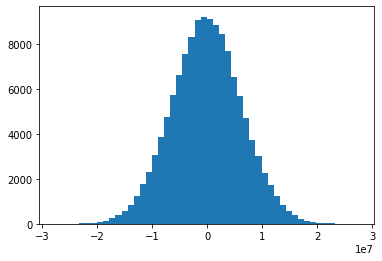

In [39]:
plt.hist(Asset_1, bins=50)
plt.show()